**ARCHIE MANALO**

**BSCS 4B**

**CSST 106**

**MACHINE PROBLEM 4**

**INSTALL OpenCV**

In [17]:
!pip install opencv-contrib-python --no-binary opencv-contrib-python

In [12]:
!pip install scikit-image

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import exposure
from skimage import io
import matplotlib.pyplot as plt
from skimage.color import rgb2gray

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kuto.jpg to kuto.jpg


In [ ]:
def harris_corner_detection(image_path):
    # Load image in grayscale
    img = cv2.imread(image_path, 0)

    # Harris corner detection
    dst = cv2.cornerHarris(img, 2, 3, 0.04)

    # Dilate the corner points to make them more visible
    dst = cv2.dilate(dst, None)

    # Threshold to mark corners in red
    img[dst > 0.01 * dst.max()] = [255]

    # Display results
    plt.subplot(1, 2, 1), plt.imshow(img, cmap='gray'), plt.title('Original Image')
    plt.subplot(1, 2, 2), plt.imshow(dst, cmap='gray'), plt.title('Harris Corners')
    plt.show()

In [ ]:
def hog_feature_extraction(image_path):
    # Load image
    img = io.imread(image_path)

    # Convert to grayscale if the image is colored
    if len(img.shape) == 3:
        img = rgb2gray(img)

    # Extract HOG features and visualize them
    features, hog_image = hog(img, pixels_per_cell=(8, 8), cells_per_block=(2, 2),
                              visualize=True, block_norm='L2-Hys')

    # Display original image and HOG visualization
    plt.subplot(1, 2, 1), plt.imshow(img, cmap='gray'), plt.title('Original Image')
    plt.subplot(1, 2, 2), plt.imshow(hog_image, cmap='gray'), plt.title('HOG Features')
    plt.show()

In [ ]:
# Task 3: ORB Feature Extraction and Matching
def orb_feature_matching(image_path1, image_path2):
    # Load images
    img1 = cv2.imread(image_path1, 0)
    img2 = cv2.imread(image_path2, 0)

    # Initialize ORB detector
    orb = cv2.ORB_create()

    # Detect keypoints and descriptors with ORB
    kp1, des1 = orb.detectAndCompute(img1, None)
    kp2, des2 = orb.detectAndCompute(img2, None)

    # FLANN based matcher
    index_params = dict(algorithm=6, table_number=6, key_size=12, multi_probe_level=1)
    search_params = dict(checks=50)
    flann = cv2.FlannBasedMatcher(index_params, search_params)

    matches = flann.knnMatch(des1, des2, k=2)

    # Store good matches using Lowe's ratio test
    good_matches = []
    for m, n in matches:
        if m.distance < 0.7 * n.distance:
            good_matches.append(m)

    # Draw matches
    img_matches = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    # Display matched keypoints
    plt.imshow(img_matches), plt.title('ORB Feature Matching')
    plt.show()

In [21]:
# Task 4 Sift and Surf Feature Extraction
def sift_feature_extraction(image_path1, image_path2):

    # Load images in grayscale
    img1 = cv2.imread(image_path1, cv2.IMREAD_GRAYSCALE)
    img2 = cv2.imread(image_path2, cv2.IMREAD_GRAYSCALE)

    # SIFT Feature Extraction
    sift = cv2.SIFT_create()
    kp1_sift, des1_sift = sift.detectAndCompute(img1, None)
    kp2_sift, des2_sift = sift.detectAndCompute(img2, None)

    # Draw SIFT Keypoints
    img1_sift = cv2.drawKeypoints(img1, kp1_sift, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    img2_sift = cv2.drawKeypoints(img2, kp2_sift, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    # Display SIFT Keypoints
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1), plt.imshow(img1_sift, cmap='gray'), plt.title('SIFT Keypoints Image 1')
    plt.subplot(1, 2, 2), plt.imshow(img2_sift, cmap='gray'), plt.title('SIFT Keypoints Image 2')
    plt.show()

In [ ]:
# Task 5: Feature Matching using Brute-Force Matcher
def brute_force_feature_matching(image_path1, image_path2):
    # Load images
    img1 = cv2.imread(image_path1, 0)
    img2 = cv2.imread(image_path2, 0)

    # ORB detector
    orb = cv2.ORB_create()

    # Detect ORB keypoints and descriptors
    kp1, des1 = orb.detectAndCompute(img1, None)
    kp2, des2 = orb.detectAndCompute(img2, None)

    # Brute-Force matcher
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = bf.match(des1, des2)

    # Sort matches by distance
    matches = sorted(matches, key=lambda x: x.distance)

    # Draw first 10 matches
    img_matches = cv2.drawMatches(img1, kp1, img2, kp2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    # Display matched keypoints
    plt.imshow(img_matches), plt.title('Brute-Force Feature Matching')
    plt.show()

In [ ]:
# Task 6: Image Segmentation using Watershed Algorithm
def watershed_segmentation(image_path):
    # Load image
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Thresholding
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Noise removal using morphological operations
    kernel = np.ones((3, 3), np.uint8)
    opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

    # Sure background area
    sure_bg = cv2.dilate(opening, kernel, iterations=3)

    # Sure foreground area
    dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
    _, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

    # Unknown region
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg, sure_fg)

    # Marker labeling
    _, markers = cv2.connectedComponents(sure_fg)
    markers = markers + 1
    markers[unknown == 255] = 0

    # Apply the Watershed algorithm
    markers = cv2.watershed(img, markers)
    img[markers == -1] = [255, 0, 0]

    # Display segmented image
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Watershed Segmentation')
    plt.show()

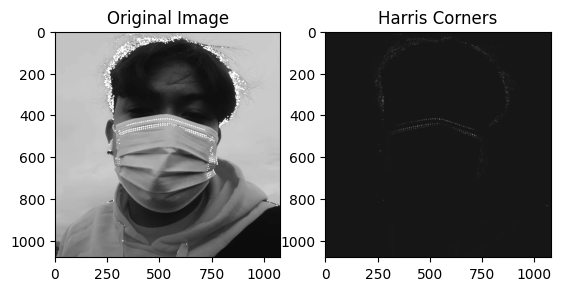

In [ ]:
harris_corner_detection('kuto.jpg')

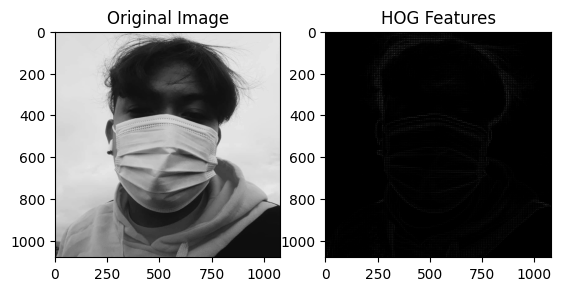

In [ ]:
hog_feature_extraction('kuto.jpg')

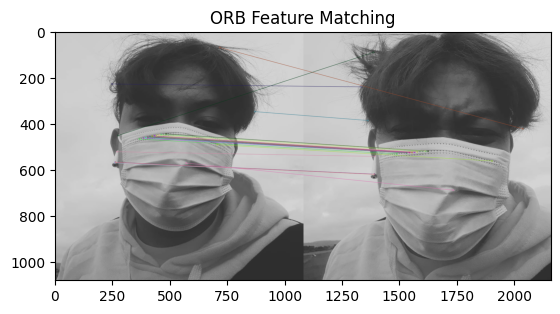

In [15]:
orb_feature_matching('kuto.jpg', 'kuto(1).jpg')

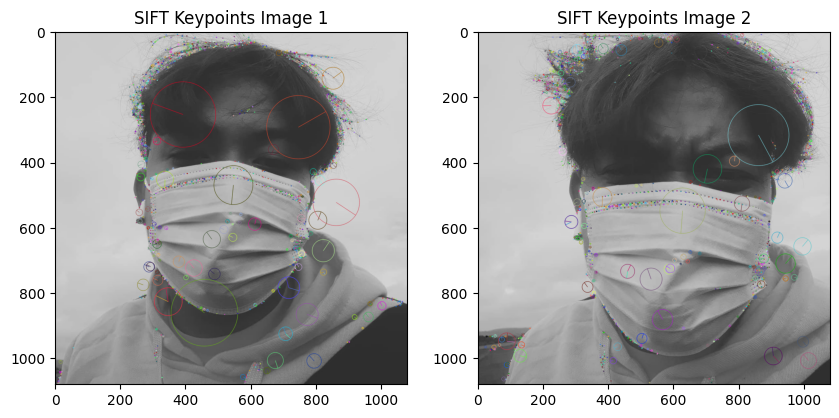

In [23]:
sift_feature_extraction('kuto.jpg', 'kuto(1).jpg')

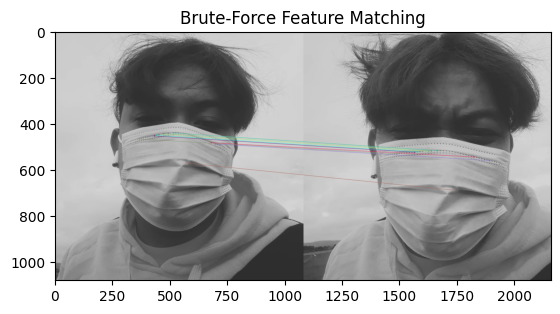

In [ ]:
brute_force_feature_matching('kuto.jpg', 'kuto(1).jpg')

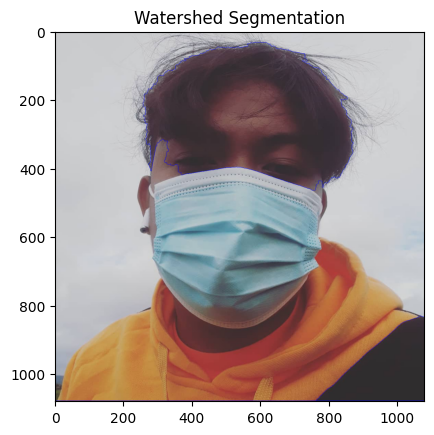

In [ ]:
watershed_segmentation('kuto.jpg')